In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 16 09:16:54 2024

@author: Annika Deutsch
@date: 12/16/2024
@title: st-sss.py
@CPU: Mac?
@Operating System: Mac?
@Interpreter and version no.: Python 3.10.9
"""

'\nCreated on Mon Dec 16 09:16:54 2024\n\n@author: Annika Deutsch\n@date: 12/16/2024\n@title: st-sss.py\n@CPU: Mac?\n@Operating System: Mac?\n@Interpreter and version no.: Python 3.10.9\n'

In [2]:
# imports
import numpy as np
from numba import njit 
import matplotlib.pyplot as plt
import rk4 #python file containing general ODE solver rk4()
from astropy.table import Table
plt.rcParams['figure.dpi'] = 300

In [3]:
gamma = 5/3

In [4]:
#-------------------Solutions to Sedov-Taylor system-----------------------------
@njit
def sedov_taylor(t, y):
    """
    Parameters
    ----------
    t : int
        time at which you are evaluating the rhs.
    y : array
        y vector at that time, for which each of the N equations could be 
        dependent.

    Returns
    -------
    f : array
        1D NumPy array holding rhs func eval of each 
    """
    f = np.zeros(3)

    numerator = y[0] * (y[1] * y[0] * (-1 + 2*y[1] - gamma) * (-1 + 8*y[1] - gamma) - 6*y[2]*(-1 + gamma**2))
    denominator = (-1 + 2*y[1] - gamma) * (-2*y[2]*(-1 + gamma)*gamma + y[0]*(1 - 2*y[1] + gamma)**2) * t
    f[0] = numerator/denominator

    f[1] = (
        6 * y[2] * (-1 + gamma) * (-1 + (-1 + 2 * y[1]) * gamma) 
        - y[1] * y[0] * (-1 + 2 * y[1] - gamma) * (4 * y[1] - 5 * (1 + gamma))
    ) / (
        2 * (-2 * y[2] * (-1 + gamma) * gamma + y[0] * (1 - 2 * y[1] + gamma)**2) * t
    )

    f[2] = (
        y[2] * (4 * y[2] * (-1 + gamma) * gamma 
        + y[0] * (1 + gamma) * (-5 * (1 + gamma) + y[1] * (14 - 8 * y[1] + gamma)))
    ) / (
        (-2 * y[2] * (-1 + gamma) * gamma + y[0] * (1 - 2 * y[1] + gamma)**2) * t
    )

    return f

In [18]:
# set up time step, neqns, y array, and inital conditions 

nt = 500
neqn = 3
y = np.ndarray((nt, neqn), dtype=float)
y0 = np.array([1.0, 1.0, 1.0])
t0 = 1.17
tf = 0

yfor = np.ndarray((nt, neqn), dtype=float)
y0for = np.array([0, 0, 0.306])
t0for = 1e-3
tffor = 1.17/2.0

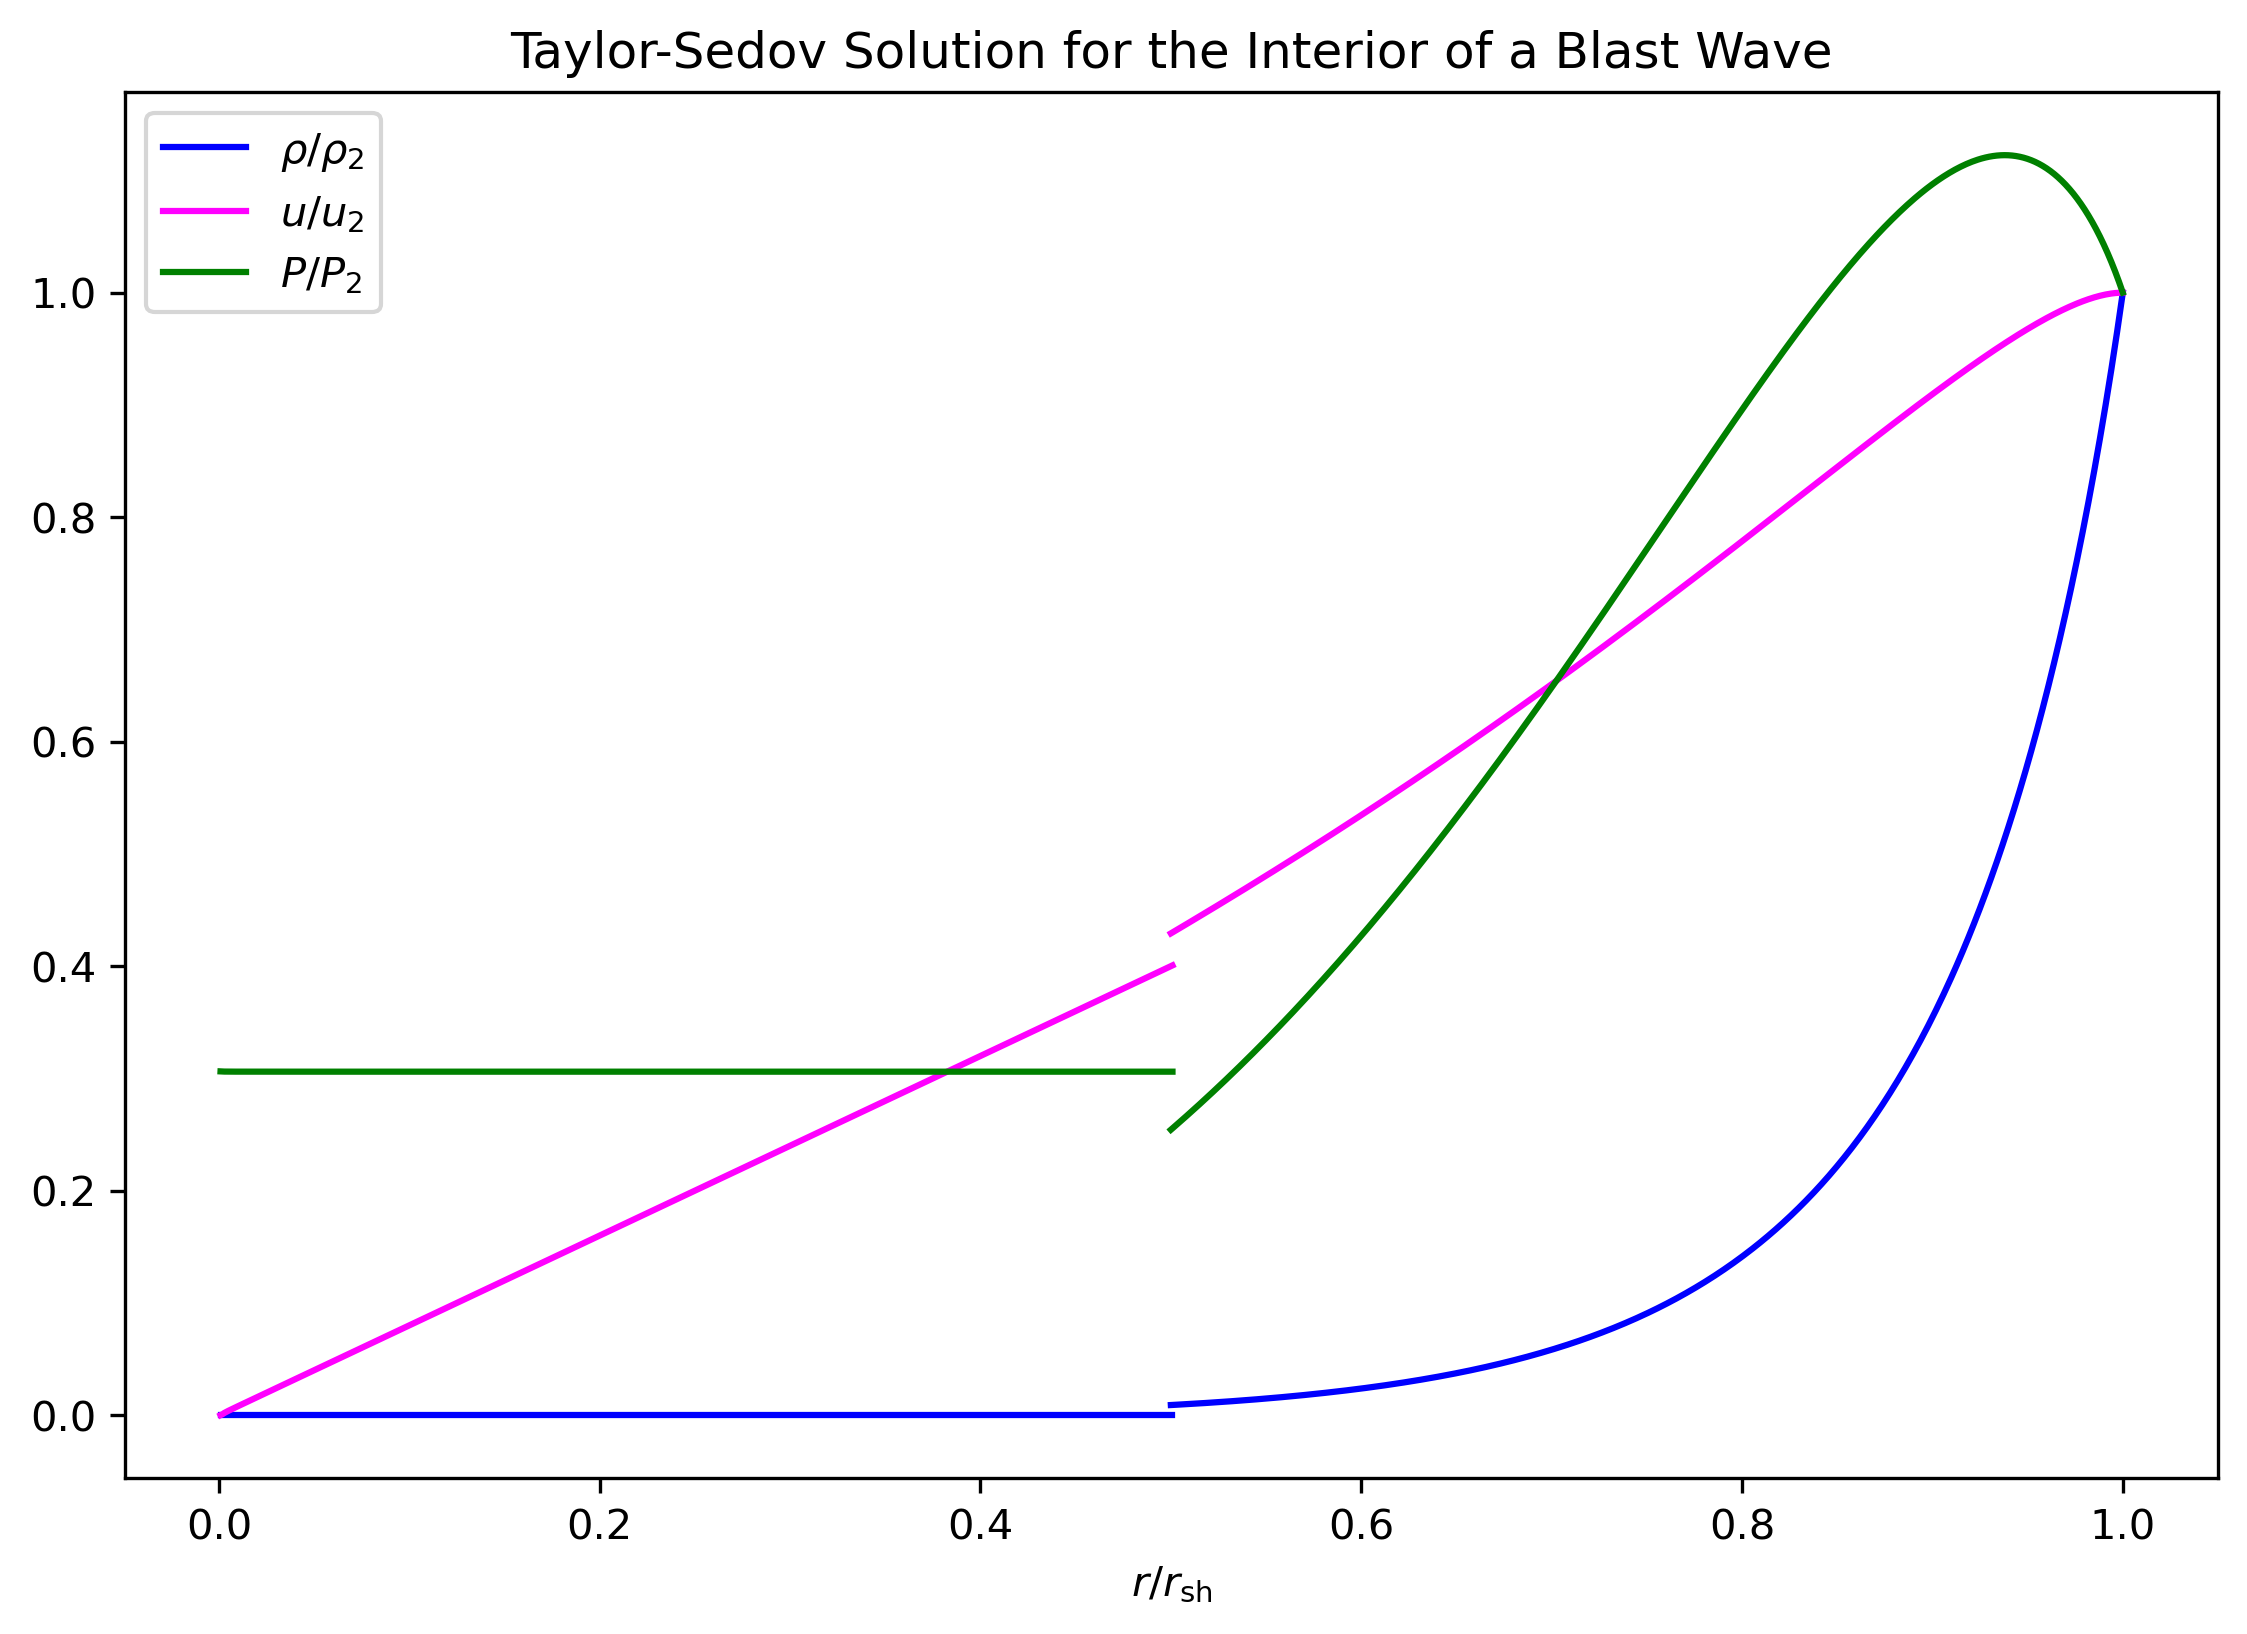

In [20]:
# use rk4 to solve for alpha, v, p

yfin_st, t_st = rk4.rk4_backwards(sedov_taylor, y, y0, t0, tf, nt, neqn)
yfor_st, tfor_st = rk4.rk4_forwards(sedov_taylor, yfor, y0for, t0for, tffor, nt, neqn)

alpha = yfin_st[:,0]
v = yfin_st[:,1]
p = yfin_st[:,2]

alpha_for = yfor_st[:,0]
v_for = yfor_st[:,1]
p_for = yfor_st[:,2]


x = t_st/t0
xfor = tfor_st/t0

plt.figure(figsize=(9,6))
plt.plot(x, alpha, color='blue', label=r'$\rho/\rho_2$')
plt.plot(xfor, alpha_for, color='blue')
plt.plot(x, x*v, color='magenta', label=r'$u/u_2$')
plt.plot(xfor, xfor*v_for, color='magenta')
plt.plot(x, x*p, color='green', label=r'$P/P_2$')
plt.plot(xfor, xfor*p_for+0.306, color='green')
plt.title("Taylor-Sedov Solution for the Interior of a Blast Wave")
plt.xlabel(r"$r/r_{\text{sh}}$")
plt.legend()

In [ ]:
# use rk4 to solve for alpha, v, p

yfin_st, t_st = rk4.rk4_backwards(sedov_taylor, y, y0, t0, tf, nt, neqn)
yfor_st, tfor_st = rk4.rk4_forwards(sedov_taylor, yfor, y0for, t0for, tffor, nt, neqn)

alpha = yfin_st[:,0]
v = yfin_st[:,1]
p = yfin_st[:,2]

alpha_for = yfor_st[:,0]
v_for = yfor_st[:,1]
p_for = yfor_st[:,2]


x = t_st/t0
xfor = tfor_st/t0

plt.figure(figsize=(9,6))
plt.plot(x, alpha, color='blue', label=r'$\rho/\rho_2$')
plt.plot(xfor, alpha_for, color='blue')
plt.plot(x, x*v, color='magenta', label=r'$u/u_2$')
plt.plot(xfor, xfor*v_for, color='magenta')
plt.plot(x, x*p, color='green', label=r'$P/P_2$')
#plt.plot(xfor, xfor*p_for, color='green')
plt.title("Taylor-Sedov Solution for the Interior of a Blast Wave")
plt.xlabel(r"$r/r_{\text{sh}}$")
plt.legend()

In [18]:
# Data from the table
time = [1, 10, 100, 1000, 10000, 100000]  # Time in years
pc_to_km = 3.086e13 # Parsecs to km conversion factor
radius_shock = np.array([0.315, 0.791, 1.99, 4.99, 12.5, 31.5])  # r_sh in pc
radius_km = radius_shock * pc_to_km
velocity_shock = [124000, 31000, 7820, 1970, 494, 124]  # U_sh in km/s

# Create the Astropy Table
snr_table = Table(
    [time, radius_shock, velocity_shock],
    names=('t', 'r_sh', 'U_sh'),
    dtype=('int', 'float', 'int')
)

# Print the table
print(snr_table)

  t     r_sh  U_sh 
------ ----- ------
     1 0.315 124000
    10 0.791  31000
   100  1.99   7820
  1000  4.99   1970
 10000  12.5    494
100000  31.5    124


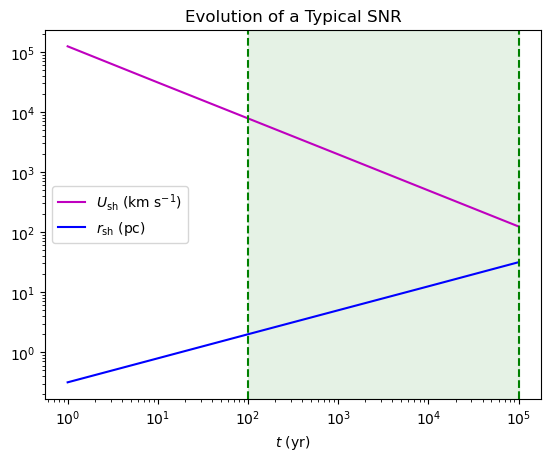

In [28]:
plt.plot(snr_table['t'],snr_table['U_sh'], color='m', label=r'$U_{\text{sh}}\text{ (km s}^{-1}\text{)}$')
plt.plot(snr_table['t'],snr_table['r_sh'], color='b', label=r'$r_{\text{sh}}$ (pc)')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$t$ (yr)')
plt.title('Evolution of a Typical SNR')
plt.axvline(x=1e2, color='green', linestyle='--')
plt.axvline(x=1e5, color='green', linestyle='--')
plt.axvspan(1e2, 1e5, color='green', alpha=0.1)
plt.legend()